# Redes de Petri en Python

In [ ]:
! pip install SNAKES

In [143]:
from snakes.nets import PetriNet, Transition, Expression, Variable, Place, Value

### Agregamos los lugares de nuestra red

In [153]:
my_net = PetriNet('First net')
value = 3

my_net.add_place(Place('p', [value]))
my_net.place()

[Place('p', MultiSet([3]), tAll)]

### Agregamos las transiciones

In [154]:
my_net.add_transition(Transition('t', Expression('x<6')))
my_net.transition()

[Transition('t', Expression('x<6'))]

### IF

In [155]:
my_net.add_input('p', 't', Variable('x'))

### OF

In [156]:
my_net.add_output('p', 't', Expression('x+1'))

In [157]:
my_net.transition('t').modes()

[Substitution(x=3)]

### Cómo ejecutamos una transición?

In [158]:
print(my_net.get_marking())

my_net.transition('t').fire(Substitution(x=value))

# Donde esta la marca luego de ejecutar?
print(my_net.get_marking())

{p={3}}
{p={4}}


# Dask y su motor de ejecución de grafos
![dask](images/grid_search_schedule.gif)

In [28]:

from IPython.display import IFrame
IFrame('http://dask.pydata.org/en/latest/index.html', width=900, height=350)



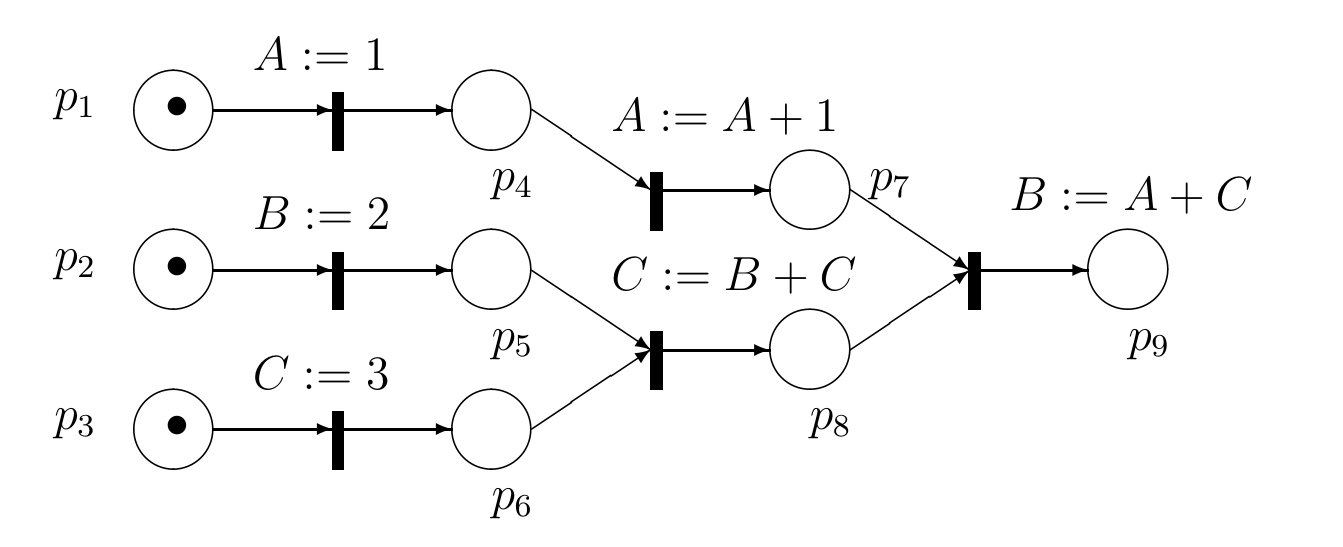

In [19]:
from IPython.display import Image
Image('images/ejercicio.png')

In [159]:
from dask import delayed

@delayed
def inc(x):
    return x + 1

@delayed
def add(x, y):
    return x + y

In [160]:
A = inc(0)
B = inc(1)
C = inc(2)
A = inc(A)
C = add(B, C)

total = add(C, A)

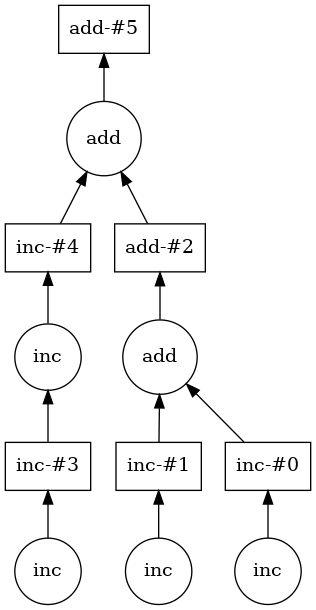

In [161]:
total.visualize()

In [162]:
total.compute()

7

In [163]:
def print_and_return(string):
    print(string)
    return string

def format_str(count, val, nwords):
    return ('the character appears {0} times of {1}, '
            'out of {2} words\n').format(count, val, nwords)

dsk = {'words': 'Leia Rey Rey Luke Luke  Luke',
       'nwords': (len, (str.split, 'words')),
       'val1': 'Leia',
       'val2': 'Rey',
       'val3': 'Luke',
       'count1': (str.count, 'words', 'val1'),
       'count2': (str.count, 'words', 'val2'),
       'count3': (str.count, 'words', 'val3'),
       'out1': (format_str, 'count1', 'val1', 'nwords'),
       'out2': (format_str, 'count2', 'val2', 'nwords'),
       'out3': (format_str, 'count3', 'val3', 'nwords'),
       'print1': (print_and_return, 'out1'),
       'print2': (print_and_return, 'out2'),
       'print3': (print_and_return, 'out3')}


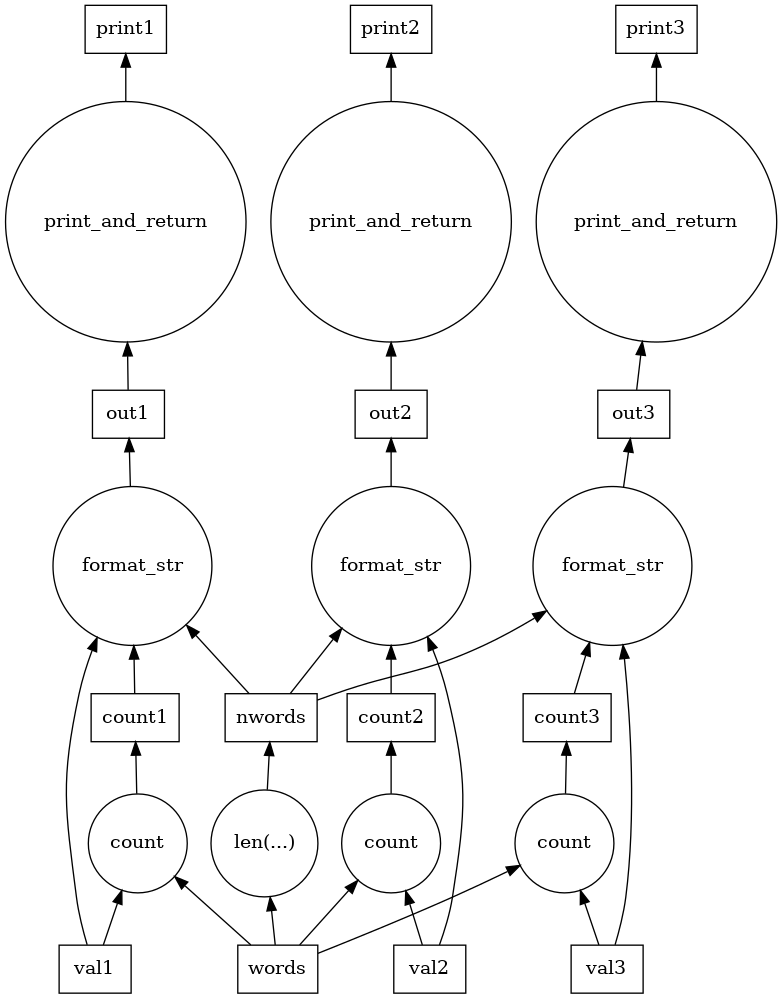

In [164]:
from dask.dot import dot_graph
dot_graph(dsk)

In [165]:
from dask.multiprocessing import get, cull

outputs = ['print1', 'print3']
results = get(dsk, outputs)

the character appears 1 times of Leia, out of 6 words
the character appears 3 times of Luke, out of 6 words




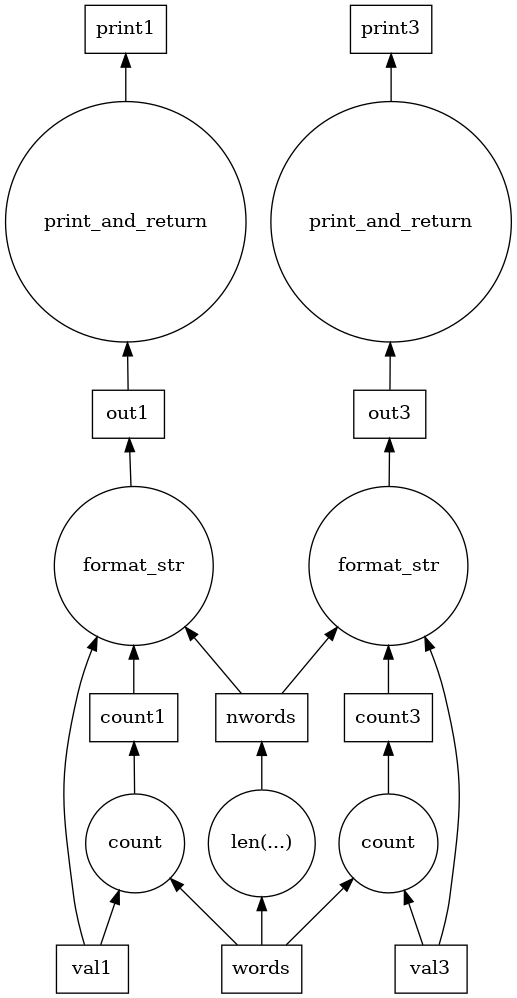

In [166]:
dsk1, dependencies = cull(dsk, outputs)
dot_graph(dsk1)